# 📰 Click bait news classifier

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Loading data

In [4]:
file_path = '/content/sample_data/clickbait_data.csv'
data = pd.read_csv(file_path)

In [5]:
data.head(10)

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
5,How To Flirt With Queer Girls Without Making A...,1
6,32 Cute Things To Distract From Your Awkward T...,1
7,If Disney Princesses Were From Florida,1
8,What's A Quote Or Lyric That Best Describes Yo...,1
9,Natalie Dormer And Sam Claflin Play A Game To ...,1


## Split our data to train test

In [6]:
text = data["headline"].values
label = data["clickbait"].values


In [7]:
x_train, x_test, y_train, y_test = train_test_split(text, label)

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(24000,) (8000,) (24000,) (8000,)


## Tokenizing the texts

In [9]:
vocab_size = 5000
maxlen = 500
embedding_size = 32

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

## Creating our model using LSTM

In [10]:
def model1():
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
  model.add(LSTM(32, return_sequences=True))
  model.add(GlobalMaxPooling1D())
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [11]:
model = model1()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
47/47 [==============================] - 19s 220ms/step - loss: 0.6554 - accuracy: 0.8163 - val_loss: 0.5461 - val_accuracy: 0.8064
Epoch 2/20
47/47 [==============================] - 8s 164ms/step - loss: 0.3563 - accuracy: 0.9523 - val_loss: 0.2135 - val_accuracy: 0.9655
Epoch 3/20
47/47 [==============================] - 6s 120ms/step - loss: 0.1640 - accuracy: 0.9695 - val_loss: 0.1246 - val_accuracy: 0.9721
Epoch 4/20
47/47 [==============================] - 3s 68ms/step - loss: 0.1021 - accuracy: 0.9798 - val_loss: 0.0953 - val_accuracy: 0.9724
Epoch 5/20
47/47 [==============================] - 2s 45ms/step - loss: 0.0709 - accuracy: 0.9851 - val_loss: 0.0826 - val_accuracy: 0.9765
Epoch 6/20
47/47 [==============================] - 2s 45ms/step - loss: 0.0550 - accuracy: 0.9882 - val_loss: 0.0793 - val_accuracy: 0.9756
Epoch 7/20
47/47 [==============================] - 2s 49ms/step - loss: 0.0429 - accuracy: 0.9902 - val_loss: 0.0772 - val_accuracy: 0.9759
Epoch 8/2

# Saving our model

In [13]:
model.save('model')

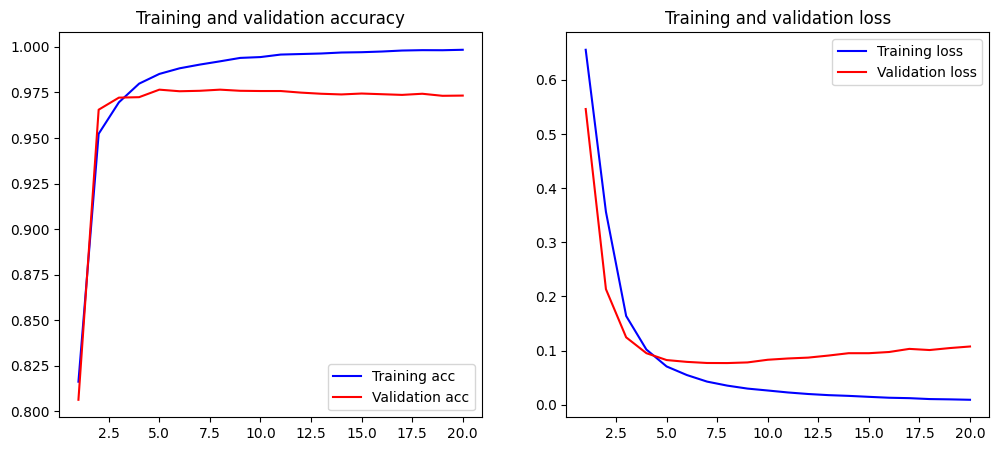

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
test = ['My biggest laugh reveal ever!', 'Premium gas discounted', 'A tour of Japan\'s Kansai region', '12 things NOT to do in Europe']
token_text = pad_sequences(tokenizer.texts_to_sequences(test), maxlen=maxlen)
preds = [round(i[0]) for i in model.predict(token_text)]
for (text, pred) in zip(test, preds):
    label = 'Clickbait' if pred == 1.0 else 'Not Clickbait'
    print("{} - {}".format(text, label))

1/1 [==============================] - 0s 41ms/step
My biggest laugh reveal ever! - Clickbait
Premium gas discounted - Not Clickbait
A tour of Japan's Kansai region - Not Clickbait
12 things NOT to do in Europe - Clickbait
